In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('tweets.csv',encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [2]:
tweets=df.drop(columns=['1467810369','Mon Apr 06 22:19:45 PDT 2009','NO_QUERY','_TheSpecialOne_'])

In [3]:
cols=['sentiment','text']
tweets.columns=cols
tweets

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   text       1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [6]:
tweets['sentiment'].value_counts()

sentiment
4    800000
0    799999
Name: count, dtype: int64

In [7]:
# 0 for negative 1 for positive
tweets['sentiment']=tweets['sentiment'].map({0:0,4:1})

In [8]:
tweets.sentiment.value_counts()

sentiment
1    800000
0    799999
Name: count, dtype: int64

In [9]:
tweets['len_text']=[len(t) for t in tweets['text']]

<Axes: >

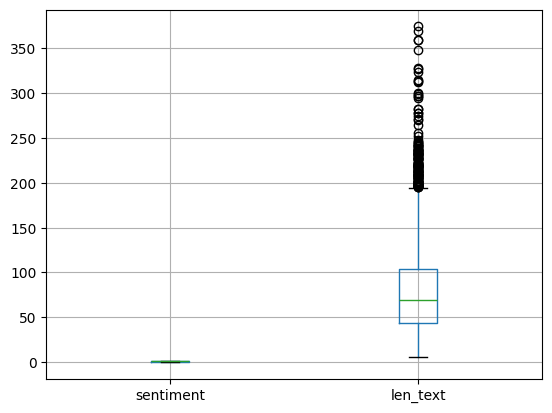

In [10]:
tweets.boxplot()

### Data cleaning

In [11]:
tweets[tweets['len_text']>140]

,sentiment,text,len_text
212,0,Awwh babs... you look so sad underneith that s...,142
225,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
278,0,Whinging. My client&amp;boss don't understand ...,145
342,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
399,0,#3 woke up and was having an accident - &quot;...,144
...,...,...,...
1599459,1,@aw16 I must have skipped the &quot;pun&quot; ...,157
1599556,1,@chinkchilla there's this brilliant add-on for...,146
1599834,1,@alexandervelky that's polite version - i only...,145
1599920,1,I just switched back to Opera (using the moi s...,142


In [12]:
tweets.text[278]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [13]:
# decoding html content like &amp,&ump 
from bs4 import BeautifulSoup
exp=BeautifulSoup(tweets.text[278],'lxml')
print(exp.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [14]:
# removing mentions 
import re
re.sub(r'@[a-zA-Z0-9]+','',tweets.text[342])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [ ]:
# getting links from the text
pat=r'(https?://[A-Za-z0-9./]+)'
tweets['text'].str.extract(pat)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1599994,NaN
1599995,http://blip.fm/
1599996,NaN
1599997,NaN


In [16]:
tweets.text[1599995	]

'TheWDB.com - Very cool to hear old Walt interviews!  â\x99« http://blip.fm/~8bmta'

In [17]:
# removing https links
re.sub(r'https?://[a-zA-Z0-9./~]+','',tweets.text[1599995])

'TheWDB.com - Very cool to hear old Walt interviews!  â\x99« '

In [18]:
# replacing ï¿½ with question mark
tweets.text[225].replace('ï¿½','?')

'Tuesday?ll start with reflection ?n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [19]:

tweets.text[174]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [20]:
# removing all special characters except alphabets
re.sub(r'[^a-zA-Z]',' ',tweets.text[174])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

### Defining function

In [22]:
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [23]:
testing=tweets.text[:100]

In [24]:
cleaned_text=[]
for t in testing:
    cleaned_text.append(tweet_cleaner(t))
cleaned_text

C:\Users\marut\AppData\Local\Temp\ipykernel_22364\1779282086.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


['is upset that he can not update his facebook by texting it and might cry as result school today also blah',
 'dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it not behaving at all mad why am here because can not see you all over there',
 'not the whole crew',
 'need hug',
 'hey long time no see yes rains bit only bit lol fine thanks how you',
 'nope they did not have it',
 'que me muera',
 'spring break in plain city it snowing',
 'just re pierced my ears',
 'could not bear to watch it and thought the ua loss was embarrassing',
 'it it counts idk why did either you never talk to me anymore',
 'would ve been the first but did not have gun not really though zac snyder just doucheclown',
 'wish got to watch it with you miss you and how was the premiere',
 'hollis death scene will hurt me severely to watch on film wry is directors cut not out now',
 'about to file taxes',
 'ahh ive always wanted to see ren

In [25]:
import time

start_time = time.time()

print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []

for i in range(0, len(tweets)):
    if (i+1) % 10000 == 0:
        print("Tweets {} of {} has been processed".format(i+1, len(df)))
    clean_tweet_texts.append(tweet_cleaner(tweets['text'][i]))

end_time = time.time()
print("Total execution time: {:.2f} seconds".format(end_time - start_time))

C:\Users\marut\AppData\Local\Temp\ipykernel_22364\1779282086.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Cleaning and parsing the tweets...

Tweets 10000 of 1599999 has been processed
Tweets 20000 of 1599999 has been processed
Tweets 30000 of 1599999 has been processed
Tweets 40000 of 1599999 has been processed
Tweets 50000 of 1599999 has been processed
Tweets 60000 of 1599999 has been processed
Tweets 70000 of 1599999 has been processed
Tweets 80000 of 1599999 has been processed
Tweets 90000 of 1599999 has been processed
Tweets 100000 of 1599999 has been processed
Tweets 110000 of 1599999 has been processed
Tweets 120000 of 1599999 has been processed
Tweets 130000 of 1599999 has been processed
Tweets 140000 of 1599999 has been processed
Tweets 150000 of 1599999 has been processed
Tweets 160000 of 1599999 has been processed
Tweets 170000 of 1599999 has been processed
Tweets 180000 of 1599999 has been processed
Tweets 190000 of 1599999 has been processed
Tweets 200000 of 1599999 has been processed
Tweets 210000 of 1599999 has been processed
Tweets 220000 of 1599999 has been processed
Tweet

In [26]:
len(clean_tweet_texts)

1599999

## word cloud

In [27]:
clean_df=pd.DataFrame({"sentiment":tweets.sentiment.values,"text":clean_tweet_texts})
clean_df

,sentiment,text
0,0,is upset that he can not update his facebook b...
1,0,dived many times for the ball managed to save ...
2,0,my whole body feels itchy and like its on fire
3,0,no it not behaving at all mad why am here beca...
4,0,not the whole crew
...,...,...
1599994,1,just woke up having no school is the best feel...
1599995,1,thewdb com very cool to hear old walt interviews
1599996,1,are you ready for your mojo makeover ask me fo...
1599997,1,happy th birthday to my boo of alll time tupac...


In [28]:
negative_twwets=clean_df[clean_df['sentiment']==0]
negative_str=" ".join(negative_twwets['text'])


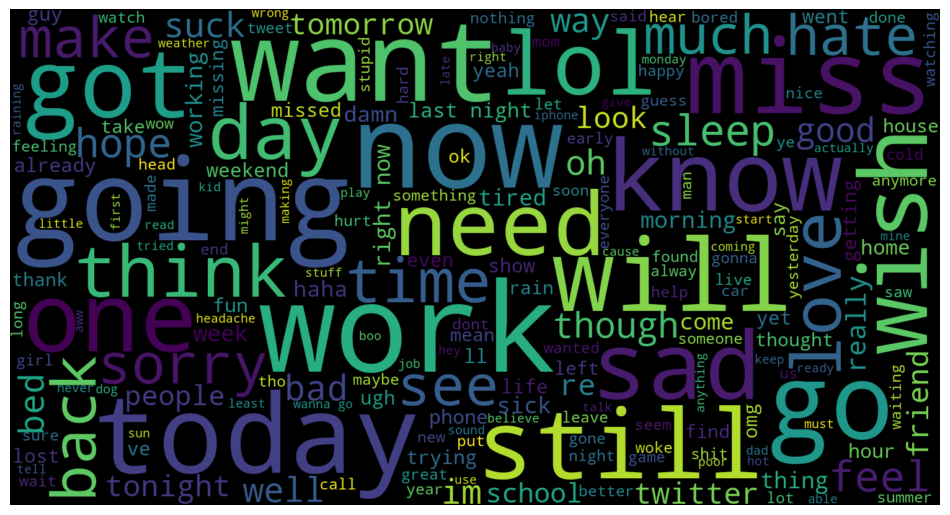

In [29]:
from wordcloud import WordCloud 
wordCloud = WordCloud(width=1500, height=800, max_font_size=200).generate(negative_str)

plt.figure(figsize=(12,10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()


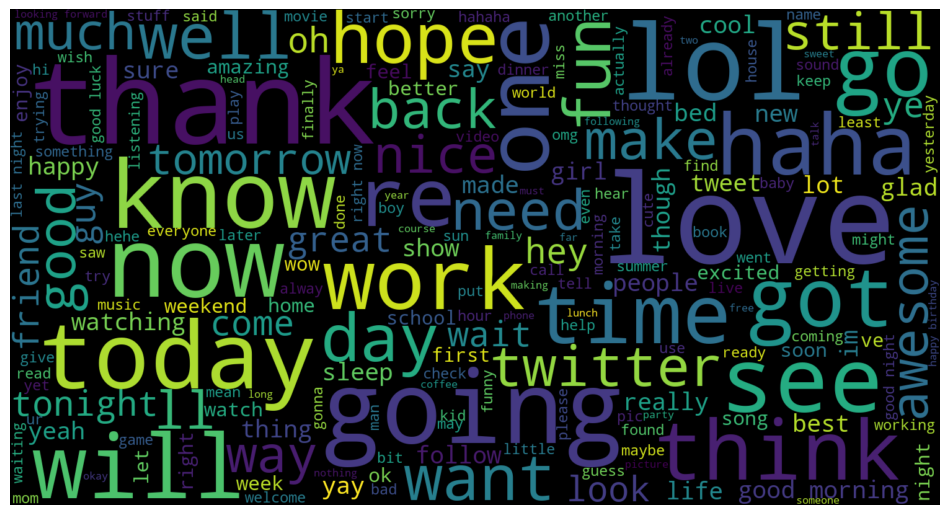

In [30]:
positive_tws=clean_df[clean_df['sentiment']==1]
positive_str=' '.join(positive_tws['text'])
wordCloud = WordCloud(width=1500, height=800, max_font_size=200).generate(positive_str)

plt.figure(figsize=(12,10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## count vectorizer

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cvec=CountVectorizer()
cvec2=cvec.fit_transform(clean_df.text)

In [41]:
len(cvec.get_feature_names_out())

264939

In [44]:
# Transforming the text data into TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer=TfidfVectorizer()
X = TfidfVectorizer.fit_transform(clean_df.text)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,clean_df.sentiment,test_size=0.2,random_state=42)

In [ ]:
# Initialize and train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

### Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Accuracy: 0.7987375, Precision: 0.7989838763031104, Recall: 0.7987375, F1-Score: 0.7986833577752647


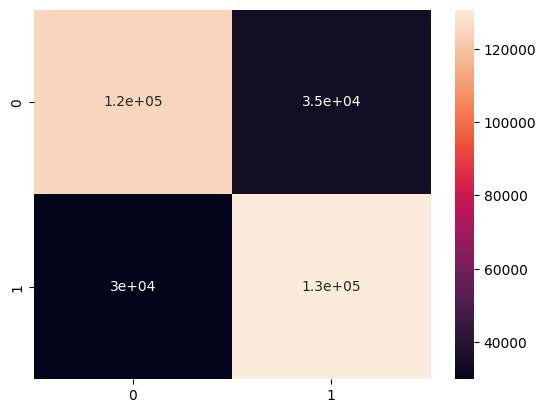

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [45]:
cm

array([[124909,  34585],
       [ 29819, 130687]], dtype=int64)

In [59]:
text='one of my friend called me and asked to meet with her at mid valley today but ve no time sigh'
print('positive' if model.predict(TfidfVectorizer.transform([text]))[0]==1 else 'negative')

negative


In [ ]:
import pickle

# Save the model to a pickle file
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(TfidfVectorizer, file)

print("Model and vectorizer have been saved successfully!")

Model and vectorizer have been saved successfully!
